# US Geological Survey

Here, motto of my analysis is to find following question ?
1)I want to see occurance of the earthquake by timeframe.
2)Similarly, cause of earthquake,maximum magnitude and its total count
3)count the range of the earthquake for example how many times does magnitude greater than 9 occurs
4)I want to analyse by country wise
5) maximum occurance of the earthquake in time scale


In [1]:
#import necessary library
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from simple_colors import*

In [2]:
df=pd.read_csv('earthquake1.csv')
df.head()

,earthquake_id,occurred_on,latitude,longitude,depth,magnitude,calculation_method,network_id,place,cause
0,1,1969-01-01 9:07:06,51.096,-179.392,45.0,5.6,mw,iscgem812771,"Andreanof Islands, Aleutian Islands, Alaska",earthquake
1,2,1969-01-02 17:50:48,-56.096,-27.842,80.1,6.0,mw,iscgemsup812819,South Sandwich Islands region,earthquake
2,3,1969-01-03 3:16:40,37.140,57.899,10.0,5.5,mw,iscgem812826,Turkmenistan-Iran border region,earthquake
3,4,1969-01-03 13:28:12,51.132,-179.306,15.0,5.9,mw,iscgem812841,"Andreanof Islands, Aleutian Islands, Alaska",earthquake
4,5,1969-01-04 22:36:48,-6.850,129.821,105.0,5.8,mw,iscgem812879,Banda Sea,earthquake


In [3]:
#shape of the data frame
df.shape

(23119, 10)

In [254]:
#missing columns
[col for col in df.columns if df[col].isnull().any()]

[]

In [255]:
# unique faeture in eaach columns
df.apply(lambda x:len(x.unique()))

earthquake_id         23119
occurred_on           23110
latitude              20614
longitude             21327
depth                  3606
magnitude                58
calculation_method       11
network_id            23119
place                  2979
cause                     3
dtype: int64

In [256]:
#data types check
df.dtypes

earthquake_id           int64
occurred_on            object
latitude              float64
longitude             float64
depth                 float64
magnitude             float64
calculation_method     object
network_id             object
place                  object
cause                  object
dtype: object

In [4]:
#lets converts occurred_on to date time format

df['occurred_on']=pd.to_datetime(df.occurred_on,format='%Y-%m-%d %H:%M:%S')

In [5]:
df.dtypes

earthquake_id                  int64
occurred_on           datetime64[ns]
latitude                     float64
longitude                    float64
depth                        float64
magnitude                    float64
calculation_method            object
network_id                    object
place                         object
cause                         object
dtype: object

In [6]:
df['year']=df.occurred_on.dt.year

In [7]:
df.columns

Index(['earthquake_id', 'occurred_on', 'latitude', 'longitude', 'depth',
       'magnitude', 'calculation_method', 'network_id', 'place', 'cause',
       'year'],
      dtype='object')

# Total occurance of earthquake in Timeframe

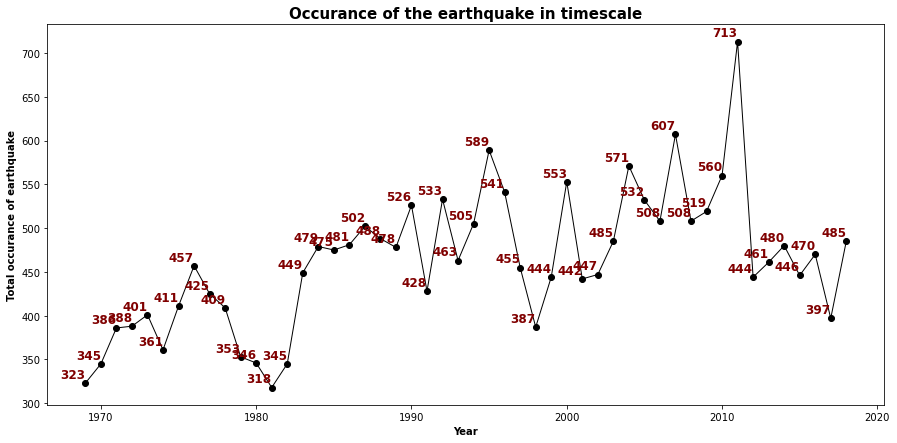

In [261]:
df_count=df.year.value_counts().reset_index()
df_count.columns=['year','count']

df_count=df_count.sort_values(by='year')
df_count.columns=['Year','Total_num']
plt.figure(figsize=(15,7))
plt.plot(df_count.Year,df_count.Total_num,marker='o',markerfacecolor='black',markeredgecolor='black',lw=1,c='black')
for x,y in zip(df_count.Year,df_count.Total_num):

    label = "{}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5),# distance from text to points (x,y)
                 fontweight='bold',
                 color='maroon',
                 size=12,
                 ha='right') # horizontal alignment can be left, right or center
plt.title('Occurance of the earthquake in timescale',fontsize=15,fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Total occurance of earthquake',fontweight='bold');

So, from above figure we can conclude that in 2011,there was maximum(713) occurance of earthquake.also,nowdays, the occurance
of earthquake id reduced.

# Total occurance by cause and its magitude and its count

In [262]:
#Now, lets see columns cause
df.cause.unique()


array(['earthquake', 'nuclear explosion', 'explosion'], dtype=object)

So, there are three cause of the earthquake.
I would like  to know 
how many earthquake were caused by earthquake,explosion and nuclear explosion along with their maximum magnitude

In [263]:
df2=df.groupby('cause').agg(maximum_magnitude=('magnitude','max'),total_count=('magnitude','count'))
df2=df2.sort_values(by='maximum_magnitude',ascending=False).reset_index()
df2

,cause,maximum_magnitude,total_count
0,earthquake,9.1,22942
1,nuclear explosion,6.9,173
2,explosion,6.4,4


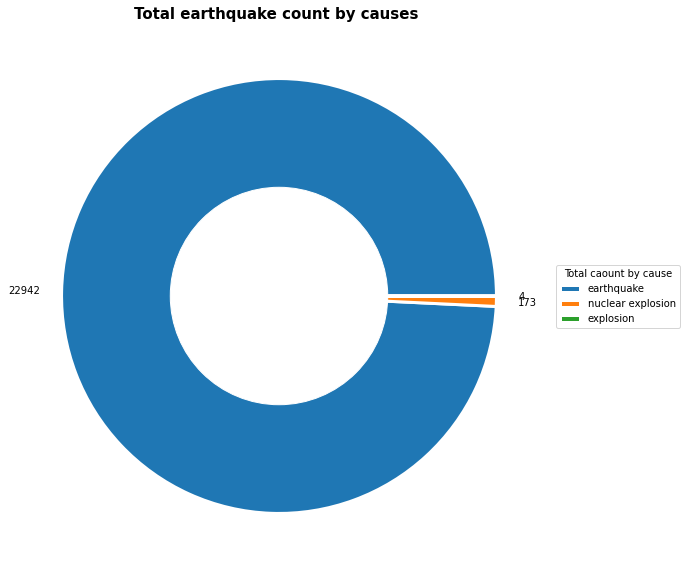

In [264]:
plt.figure(figsize=(15,10))
my_circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(df2.total_count, labels=df2.total_count,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(df2.cause,
          title="Total caount by cause",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Total earthquake count by causes ',fontsize=15,fontweight='bold');



So, there were 22942  real earthquakes having maximum magnitude 9.1rc,
similarly,173 earthquake were by nuclear explosion  having maximum magnitde 6.9rc,
and finally, 4 earthquake were caused bo other explosion having  maximum magnitude 6.4 rc.

# Top 15 places of occrance of earthquake by magnitude

In [241]:
df.place

0        Andreanof Islands, Aleutian Islands, Alaska
1                      South Sandwich Islands region
2                    Turkmenistan-Iran border region
3        Andreanof Islands, Aleutian Islands, Alaska
4                                          Banda Sea
                            ...                     
23114                       149km S of Hihifo, Tonga
23115                 64km S of Manokwari, Indonesia
23116           96km ESE of Pondaguitan, Philippines
23117             89km NW of Lubuklinggau, Indonesia
23118                   114km SE of Cold Bay, Alaska
Name: place, Length: 23119, dtype: object

In [242]:
#extracting last items only
df.place=df.place.apply(lambda x:x.split(',')[-1])

In [243]:
final=df.sort_values(by='magnitude',ascending=False)[:15]
final

,earthquake_id,occurred_on,latitude,longitude,depth,magnitude,calculation_method,network_id,place,cause,year
19327,19328,2011-03-11 05:46:24,38.2970,142.3730,29.00,9.1,mww,official20110311054624120_30,Japan,earthquake,2011
15908,15909,2004-12-26 00:58:53,3.2950,95.9820,30.00,9.1,mw,official20041226005853450_30,off the west coast of northern Sumatra,earthquake,2004
18755,18756,2010-02-27 06:34:12,-36.1220,-72.8980,22.90,8.8,mww,official20100227063411530_30,Chile,earthquake,2010
20043,20044,2012-04-11 08:38:37,2.3270,93.0630,20.00,8.6,mw,official20120411083836720_20,off the west coast of northern Sumatra,earthquake,2012
16153,16154,2005-03-28 16:09:37,2.0850,97.1080,30.00,8.6,mww,official20050328160936530_30,Indonesia,earthquake,2005
17439,17440,2007-09-12 11:10:27,-4.4380,101.3670,34.00,8.4,mww,official20070912111026830_34,Indonesia,earthquake,2007
14263,14264,2001-06-23 20:33:14,-16.2650,-73.6410,33.00,8.4,mww,official20010623203314130_33,near the coast of southern Peru,earthquake,2001
15272,15273,2003-09-25 19:50:06,41.8150,143.9100,27.00,8.3,mwc,usp000c8kv,Japan region,earthquake,2003
10949,10950,1994-10-04 13:22:56,43.7730,147.3210,14.00,8.3,mw,usp0006kdp,Kuril Islands,earthquake,1994
3284,3285,1977-08-19 06:08:55,-11.1640,118.3780,25.00,8.3,mw,iscgem694739,Indonesia,earthquake,1977


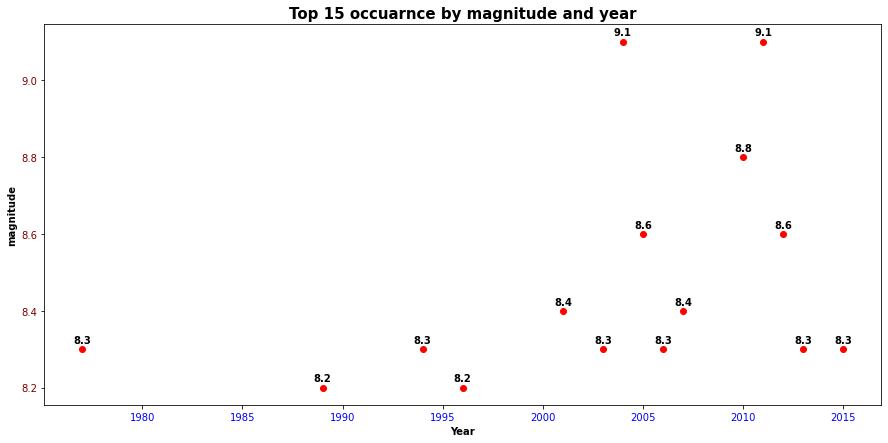

In [244]:
plt.figure(figsize=(15,7))
xs=final.year
ys=final.magnitude
plt.scatter(xs,ys,color='red')
for x,y in zip(xs,ys):
    label = f"{y}"
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,6), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontweight='bold')
    
plt.title('Top 15 occuarnce by magnitude and year',fontweight='bold',fontsize=15)
plt.xlabel('Year',fontweight='bold')
plt.xticks(color='blue')
plt.yticks(color='maroon')
plt.ylabel('magnitude',fontweight='bold');


# Next thing, i want to know how many earthquake occurs in range of 5-6,6-7,7-8,8-9,9-10

In [245]:
df['bins']=pd.cut(df.magnitude,bins=[5,6,7,8,9,10],right=False)

In [246]:
df_bar=df.groupby('bins')['bins'].agg({'count'})
df_bar=df_bar.reset_index()
df_bar

,bins,count
0,"[5, 6)",16057
1,"[6, 7)",6357
2,"[7, 8)",665
3,"[8, 9)",38
4,"[9, 10)",2


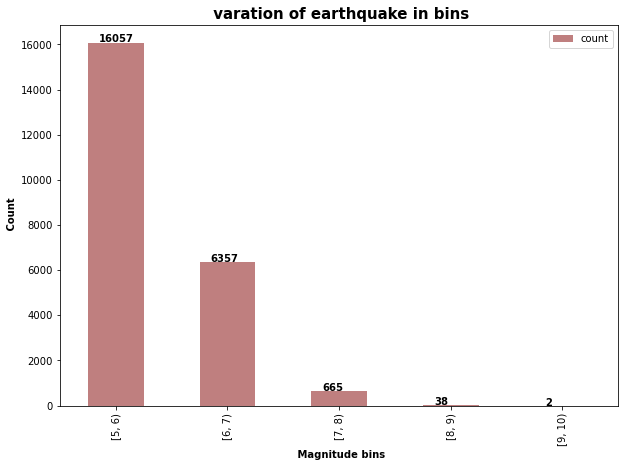

In [247]:
ax=df.groupby('bins')['bins'].agg({'count'}).plot(kind='bar',
                                               alpha=0.5,
                                              figsize=(10,7),color='maroon')
plt.xlabel(' Magnitude bins',fontweight='bold')
plt.title(' varation of earthquake in bins',fontweight='bold',fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.1 * 1.005, p.get_height() * 1.005),fontweight='bold')
    

plt.ylabel(' Count',fontweight='bold');

In [ ]:
So, we can see from above figure that, magnitude of range 5-6 occurs maximum and magnitude greater than 9 occurs only two times

# Which month has maximum earthquake occurrance ?

In [17]:
df['month']=df.occurred_on.dt.month
df['hour']=df.occurred_on.dt.hour
import calendar
df['Month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [28]:
df1=df.groupby('Month')['magnitude'].agg('count').reset_index()
df1.columns=['month','total_count']
df1=df1.sort_values(by='total_count',ascending=True,ignore_index=True)
px.bar(data_frame=df1,y='month',x='total_count',text='total_count',title='occurance of earthquake by month')

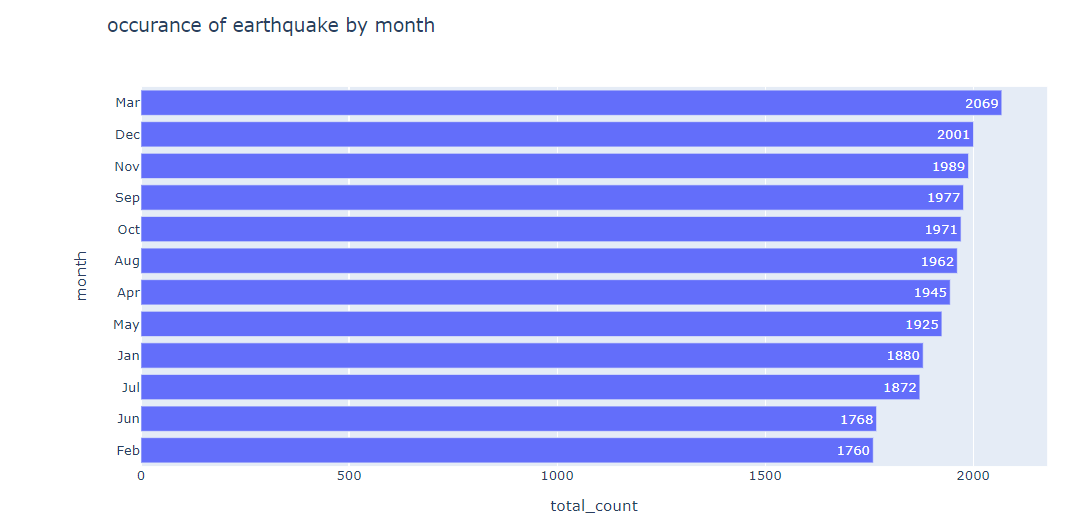

In [ ]:
So, maximum earthquake occurs in month of March and least at Febrary

# In which time(hour) has maximum earthquake occurrance ?

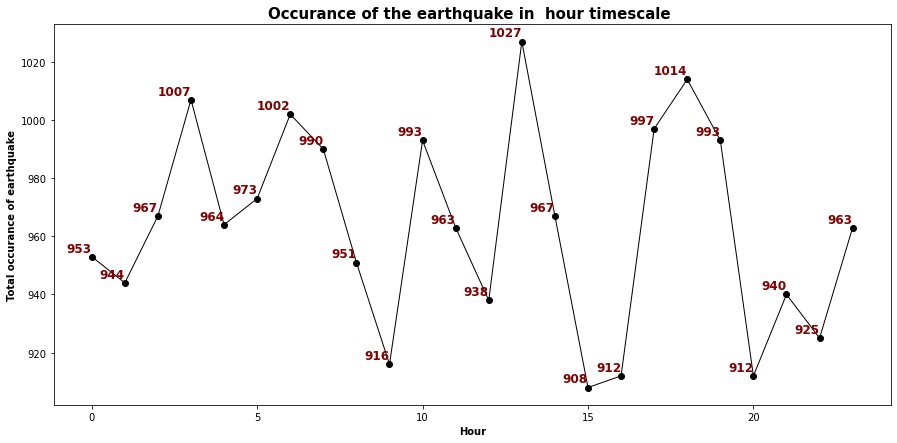

In [15]:
df1=df.groupby('hour')['magnitude'].agg('count').reset_index()
import plotly.express as px
df1.columns=['hour','total_count']
#px.line(data_frame=df1,x='hour',y='total_count',text='total_count')

plt.figure(figsize=(15,7))
plt.plot(df1.hour,df1.total_count,marker='o',markerfacecolor='black',markeredgecolor='black',lw=1,c='black')
for x,y in zip(df1.hour,df1.total_count):

    label = "{}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5),# distance from text to points (x,y)
                 fontweight='bold',
                 color='maroon',
                 size=12,
                 ha='right') # horizontal alignment can be left, right or center
plt.title('Occurance of the earthquake in  hour timescale ',fontsize=15,fontweight='bold')
plt.xlabel('Hour',fontweight='bold')
plt.ylabel('Total occurance of earthquake',fontweight='bold');

In [ ]:
So,maximum earthquake occurs at 1pm and least at 3 pm

# coutry wise earthquake occurance calculation

In [248]:
# coutry wise earthquake occurance calculation
def earthquake(c,c1):
    """ function that shows occurance of earthquake  with respect to country  """
    
    print(black('earthquake analysis US Geological Survey'.upper().center(100,'*'),'bold'))
    print(green('World wide'.center(90,'*')))
    print(blue(f' threre were {df.shape[0]} earthquake between {min(df.occurred_on)} and {max(df.occurred_on)}'))
    df2=df.groupby('cause').agg({'cause':'count','magnitude':'max'})
    print(df2.sort_values(by='magnitude',ascending=False))
    print('*'*90)
    df2=df[df.place.str.contains(c1)]
    df2.sort_values(by='magnitude',ascending=False)[['occurred_on','magnitude']]
    print(red(f' there were {df2.shape[0]} earthquake in {c1} between {min(df2.occurred_on)} and {max(df2.occurred_on)}','bold'))
    print('*'*90)
    print(df2.sort_values(by='magnitude',ascending=False)[['occurred_on','magnitude']])
    #return df2.sort_values(by='magnitude',ascending=False)[['occurred_on']].plot()

In [250]:
earthquake(df,'Nepal')

******************************EARTHQUAKE ANALYSIS US GEOLOGICAL SURVEY******************************
****************************************World wide****************************************
 threre were 23119 earthquake between 1969-01-01 09:07:06 and 2018-12-31 02:35:38
                   cause  magnitude
cause                              
earthquake         22942        9.1
nuclear explosion    173        6.9
explosion              4        6.4
******************************************************************************************
 there were 20 earthquake in Nepal between 1974-03-24 14:16:03 and 2015-05-16 11:34:10
******************************************************************************************
              occurred_on  magnitude
21432 2015-04-25 06:11:26        7.8
21462 2015-05-12 07:05:20        7.3
7983  1988-08-20 23:09:10        6.9
21438 2015-04-26 07:09:11        6.7
21435 2015-04-25 06:45:21        6.6
4475  1980-07-29 14:58:41        6.5
21464 2015-05-12 0